In [1]:
#Import data set
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/gaurisonawane/Downloads/Salary_Data (1).csv")

In [3]:
#EDA
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.shape

(30, 2)

In [5]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
import matplotlib.pyplot as plt

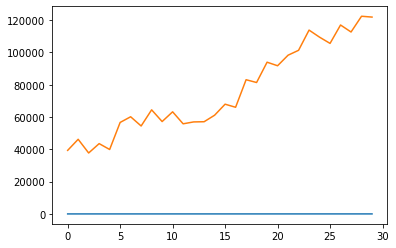

In [9]:
plt.plot(data)

In [10]:
import seaborn as sns

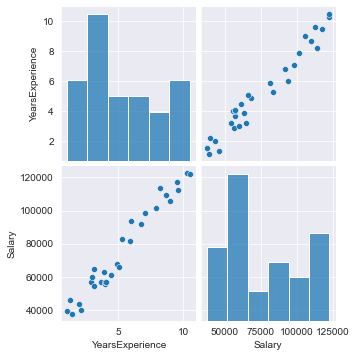

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

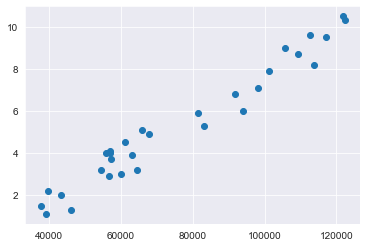

In [12]:
plt.scatter(data.Salary, data.YearsExperience)

In [13]:
#Correlation
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\91976\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

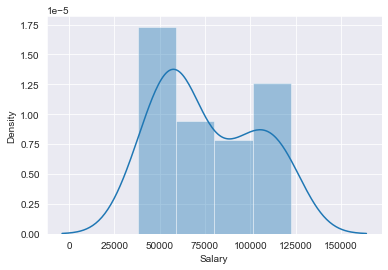

In [14]:
sns.distplot(data.Salary)

C:\Users\91976\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

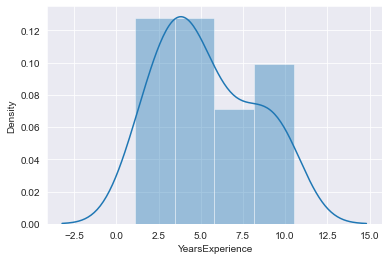

In [15]:
sns.distplot(data['YearsExperience'])

In [16]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience", data=data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

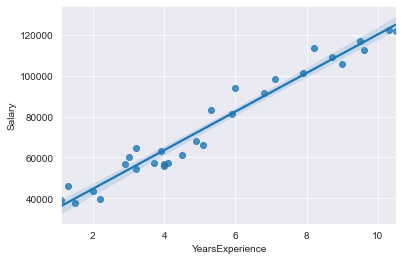

In [17]:
sns.regplot(x= 'YearsExperience', y= 'Salary', data=data)

In [18]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [19]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [20]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        15:44:24   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Building model on transformed data
import numpy as np
salary = data['Salary']
log_YearsExperience = np.log10(data['YearsExperience'])

In [23]:
log_data = [salary, log_YearsExperience]

In [24]:
df = pd.DataFrame(log_data)

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Salary,39343.000000,46205.000000,37731.000000,43525.00000,39891.000000,56642.000000,60150.000000,54445.00000,64445.00000,57189.000000,...,91738.000000,98273.000000,101302.000000,113812.000000,109431.000000,105582.000000,116969.000000,112635.000000,122391.000000,121872.000000
YearsExperience,0.041393,0.113943,0.176091,0.30103,0.342423,0.462398,0.477121,0.50515,0.50515,0.568202,...,0.832509,0.851258,0.897627,0.913814,0.939519,0.954243,0.977724,0.982271,1.012837,1.021189


In [26]:
df1 = pd.DataFrame.transpose(df)

In [27]:
df1.head(10)

,Salary,YearsExperience
0,39343.0,0.041393
1,46205.0,0.113943
2,37731.0,0.176091
3,43525.0,0.301030
4,39891.0,0.342423
5,56642.0,0.462398
6,60150.0,0.477121
7,54445.0,0.505150
8,64445.0,0.505150
9,57189.0,0.568202


In [28]:
model1 = smf.ols('salary~YearsExperience', data = df1).fit()

In [29]:
model1.params

Intercept          14927.97177
YearsExperience    93443.48052
dtype: float64

In [30]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           3.25e-13
Time:                        15:47:05   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
YearsExperience  9.344e+04   7304.844     12.792      0.000    7.85e+04    1.08e+05
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""